In [1]:
from typing import List, Callable, Any
from collections import defaultdict
from testcases import tescase
from jovian.pythondsa import  evaluate_test_case,  evaluate_test_cases

<IPython.core.display.Javascript object>

###### 1. query occurs some where in the middle
###### 2. query is the first element
###### 3. query is the last element
###### 4. cards contains ony one element
###### 5. cards is empty
###### 6. query don't hold any position in an cards
###### 7. what if the same number is repeting     ----> lowest possible index or right possible index
###### 8. 

#### Over Comming the limitation of compters by divising cleaver technique to solve problems

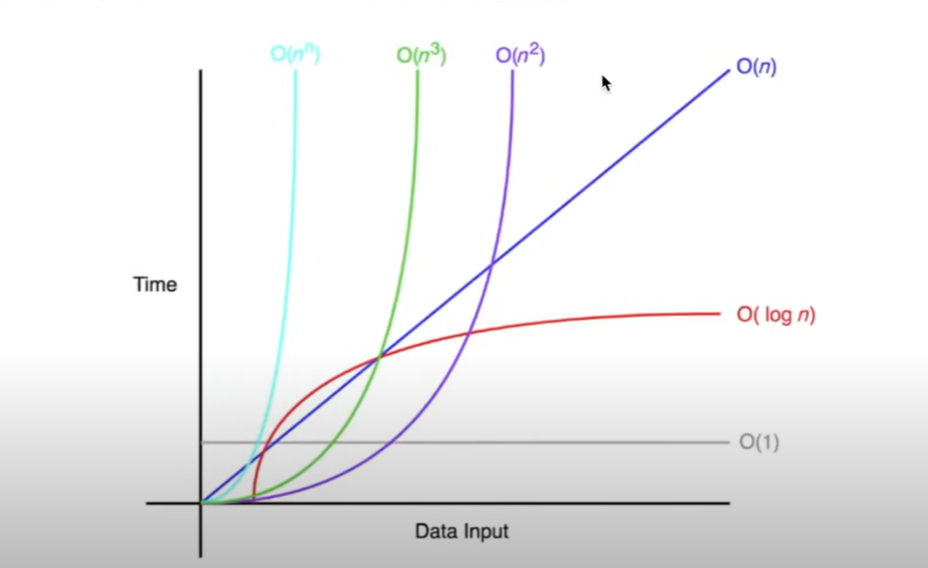

In [2]:
tescase.append({
    'input' : {
        'cards': [],
        'query': 3
    },
    'output': -1
})

In [3]:
tescase.append({
    'input': {
        'cards': list(range(10000000, 0, -1)),
        'query': 2,
    },
    'output': 9999998
})

In [4]:
def test_location(cards: List[int], query: int, mid: int):
    mid_number = cards[mid]
    if mid_number == query:
        if mid -1 >=0 and cards[mid -1] == query:
            return "left"
        return "found"
    elif mid_number > query:
        return "right"
    return "left"

def decreasing_binary_Search(cards: List[int], query : int):
    
    start, end = 0, len(cards) -1
    while(end >= start):
        mid = end - (end - start)//2
        position = test_location(cards, query, mid)

        if position == "found":
            return mid
        elif position == "left":
            end = mid - 1
        else:
            start = mid + 1
    return -1

In [5]:
def binary_search(start: int, end: int, condition: Callable[..., str], display= False) -> int:
    while(end >= start):
        mid = end - (end - start)//2
        ptr_position = condition(mid)

        if display:
            print(f'start={start}, end={end}, mid={mid}')
        
        if ptr_position == "found":
            return mid
        elif ptr_position == "left":
            end = mid -1
        else:
            start = mid +1
    return -1

In [6]:
def locate_card(cards: List[int], query: int) -> int:
    def condition(mid: int) -> str:      # Function Closure
        if cards[mid] == query:
            if mid -1 >=0 and cards[mid -1]==query:
                return "left"
            return "found"
        elif cards[mid] > query:
            return "right"
        return "left"
    return binary_search(0, len(cards) -1, condition)

In [7]:
def linear_locate_card(cards: List[int], query : int):
    for index, ele in enumerate(cards):
        if ele == query:
            return index
    return -1

In [8]:
evaluate_test_cases(decreasing_binary_Search, test_cases=tescase)


TEST CASE #0

Input:
{'cards': [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 1], 'query': 5}

Expected Output:
1


Actual Output:
1

Execution Time:
0.012 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'cards': [], 'query': 3}

Expected Output:
-1


Actual Output:
-1

Execution Time:
0.005 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'cards': [10000000, 9999999, 9999998, 9999997, 9999996, 9999995, 9999994, 9999993, 9999992, 9999991...

Expected Output:
9999998


Actual Output:
9999998

Execution Time:
0.028 ms

Test Result:
PASSED


SUMMARY

TOTAL: 3, PASSED: 3, FAILED: 0


[(1, True, 0.012), (-1, True, 0.005), (9999998, True, 0.028)]

In [9]:
evaluate_test_case(linear_locate_card, tescase[2])


Input:
{'cards': [10000000, 9999999, 9999998, 9999997, 9999996, 9999995, 9999994, 9999993, 9999992, 9999991...

Expected Output:
9999998


Actual Output:
9999998

Execution Time:
478.479 ms

Test Result:
PASSED



(9999998, True, 478.479)

In [10]:
evaluate_test_case(decreasing_binary_Search, tescase[2])


Input:
{'cards': [10000000, 9999999, 9999998, 9999997, 9999996, 9999995, 9999994, 9999993, 9999992, 9999991...

Expected Output:
9999998


Actual Output:
9999998

Execution Time:
0.05 ms

Test Result:
PASSED



(9999998, True, 0.05)

In [11]:
evaluate_test_cases(locate_card, tescase)


TEST CASE #0

Input:
{'cards': [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 1], 'query': 5}

Expected Output:
1


Actual Output:
1

Execution Time:
0.014 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'cards': [], 'query': 3}

Expected Output:
-1


Actual Output:
-1

Execution Time:
0.004 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'cards': [10000000, 9999999, 9999998, 9999997, 9999996, 9999995, 9999994, 9999993, 9999992, 9999991...

Expected Output:
9999998


Actual Output:
9999998

Execution Time:
0.028 ms

Test Result:
PASSED


SUMMARY

TOTAL: 3, PASSED: 3, FAILED: 0


[(1, True, 0.014), (-1, True, 0.004), (9999998, True, 0.028)]

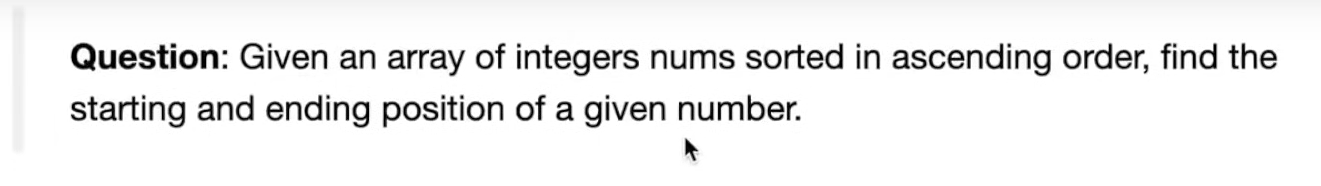

In [12]:
def calculate_length(cards: List[int], query: int) -> int:
    def first_position() -> int:
        def condition(mid: int) -> str:
            if cards[mid] == query:
                if mid -1 >= 0 and cards[mid -1] ==query:
                    return "left"
                return "found"
            elif cards[mid] > query:
                return "left"
            return "right"
        return binary_search(0, len(cards) -1, condition)

    def last_position() -> int:
        def condition(mid : int):
            if cards[mid] == query:
                if mid < len(cards) -1 and cards[mid + 1] == query:
                    return "right"
                return "found"
            elif cards[mid] > query:
                return "left"
            return "right"
        return binary_search(0, len(cards) -1, condition)
    
    first_index = first_position()

    if first_index == -1:
        return -1
    return last_position() - first_index + 1

In [13]:
tescase.append({
    'inputs': {
        'cards': [6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 1],
        'query': 4
    },
    'output': 5
})

In [14]:
calculate_length([1, 2, 3, 4, 4, 4, 4, 4, 4, 4,4 ,4 ,4 , 5, 6, 7], query=4)

10

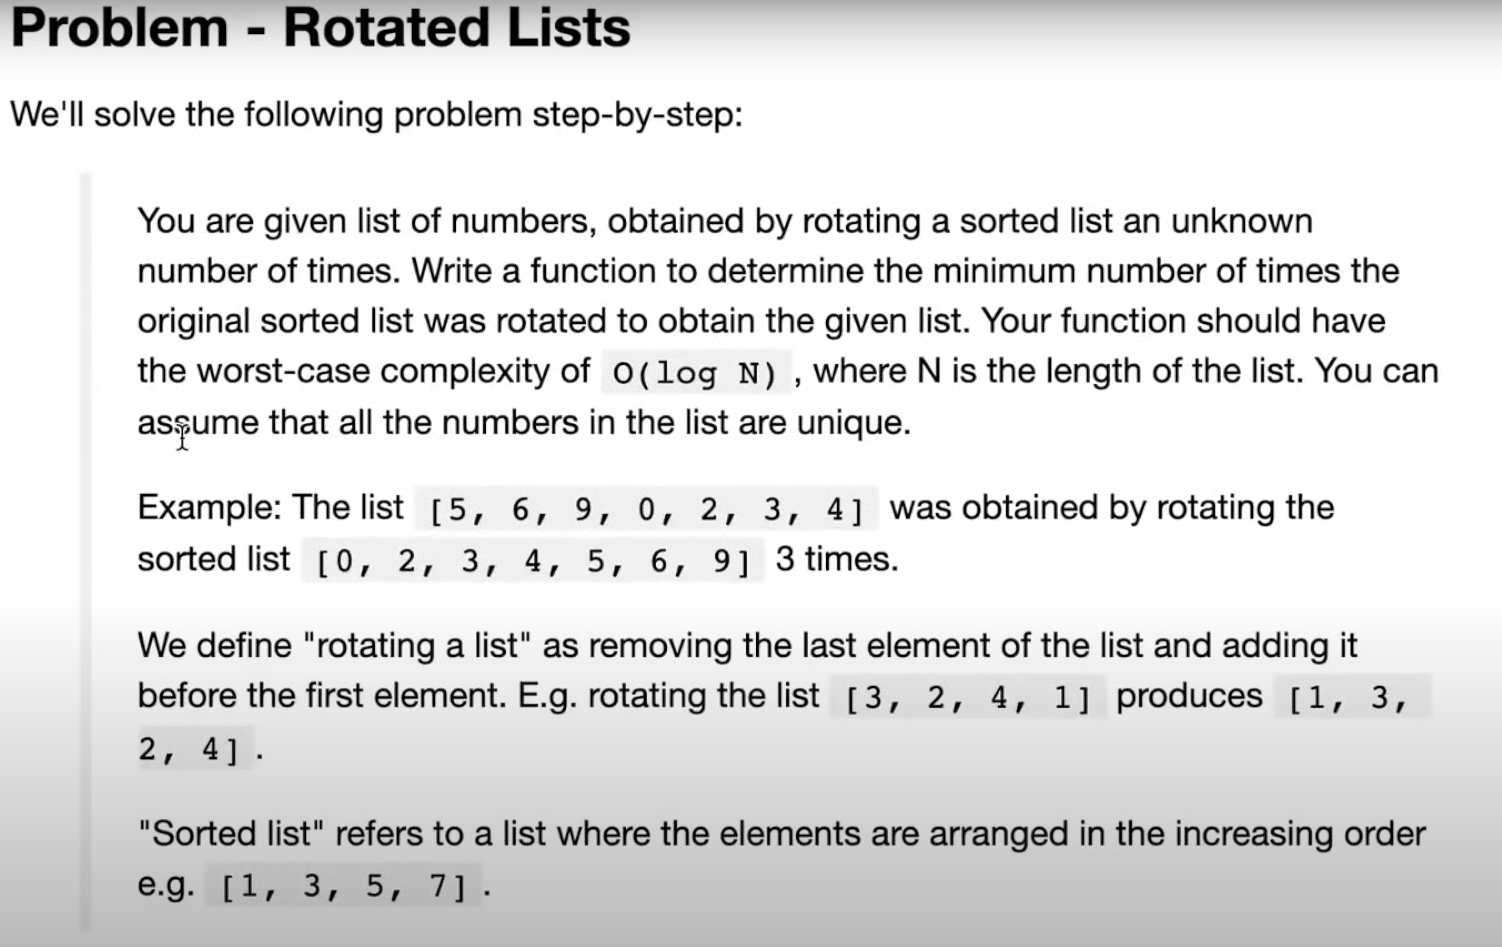

EDGE case senario
<br>

arr = [0, 1, 2, 3, 4, 5, 6, 7] --> 0<br>
arr = [7, 6, 5, 4, 3, 2, 1] --> ❌ (since this list is sorted this scenario is not valid)<br>
arr = []  --> -1<br>

Normal Case <br>

arr = [5, 6, 9, 0, 2, 3, 4] <br>
arr = [2, 3, 4, 5, 6, 9, 0] <br>

In [15]:
test_case = [
    {
        'input' : {
            'arr' : []
        },
        'output': -1
    },
    {
        'input' : {
            'arr' : [0, 1, 2, 3, 4, 5, 6, 7]
        },
        'output': 0
    },
    {
        'input' : {
            'arr' : [5, 6, 9, 0, 2, 3, 4]
        },
        'output': 3
    },
    {
        'input' : {
            'arr' : [2, 3, 4, 5, 6, 9, 0]
        },
        'output': 6
    },
]

In [16]:
test_case.append({
    'input' : {
        'arr' : [5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3, 3, 4, 4]
    },
    'output': 6
})

In [17]:
test_case.append({
    'input' : {
        'arr' : [ 3, 4, 4, 5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3]
    },
    'output': 9
})

In [18]:
def count_rotated_index(arr: List[int]) -> int:
    lastIndex = len(arr) -1

    if lastIndex == -1:
        return -1
    
    def condition(mid: int) -> str:
        if mid -1 >=0 and arr[mid] < arr[mid -1]:
            return "found"
        elif arr[mid] > arr[0]:
            return "right"
        return "left"
    result = binary_search(0, lastIndex, condition, True)

    print(result)

    if result == -1:
        return 0

    # while result -1 >= 0 and arr[result] == arr[result -1]:
    #     result -= 1
    return result


In [19]:
evaluate_test_case(count_rotated_index, test_case[5])


Input:
{'arr': [3, 4, 4, 5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3]}

Expected Output:
9

start=0, end=14, mid=7
start=8, end=14, mid=11
start=8, end=10, mid=9
9

Actual Output:
9

Execution Time:
0.104 ms

Test Result:
PASSED



(9, True, 0.104)

In [20]:
def count_rotation_linear(arr: List[int]):
    position = 0

    while position <= len(arr) -1:

        if position -1 >= 0 and arr[position] < arr[position -1]:
            return position
        
        position += 1
        
    return 0

In [21]:
def rotated_index(arr: List[int]) -> int:
    lo, hi = 0, len(arr) -1

    if hi == -1:
        return -1

    while hi >= lo:
        mid = hi - (hi - lo)//2
        if mid -1 >=0 and arr[mid] < arr[mid -1]:
            return mid
        elif arr[mid] > arr[lo]:
            lo = mid + 1
        else:
            hi = mid -1
    return 0

In [22]:
test_case

[{'input': {'arr': []}, 'output': -1},
 {'input': {'arr': [0, 1, 2, 3, 4, 5, 6, 7]}, 'output': 0},
 {'input': {'arr': [5, 6, 9, 0, 2, 3, 4]}, 'output': 3},
 {'input': {'arr': [2, 3, 4, 5, 6, 9, 0]}, 'output': 6},
 {'input': {'arr': [5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3, 3, 4, 4]},
  'output': 6},
 {'input': {'arr': [3, 4, 4, 5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3]},
  'output': 9}]

In [23]:
evaluate_test_cases(rotated_index, test_case)


TEST CASE #0

Input:
{'arr': []}

Expected Output:
-1


Actual Output:
-1

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'arr': [0, 1, 2, 3, 4, 5, 6, 7]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.006 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'arr': [5, 6, 9, 0, 2, 3, 4]}

Expected Output:
3


Actual Output:
3

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'arr': [2, 3, 4, 5, 6, 9, 0]}

Expected Output:
6


Actual Output:
6

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'arr': [5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3, 3, 4, 4]}

Expected Output:
6


Actual Output:
0

Execution Time:
0.002 ms

Test Result:
FAILED


TEST CASE #5

Input:
{'arr': [3, 4, 4, 5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3]}

Expected Output:
9


Actual Output:
9

Execution Time:
0.003 ms

Test Result:
PASSED


SUMMARY

TOTAL: 6, PASSED: 5, FAILED: 1


[(-1, True, 0.003),
 (0, True, 0.006),
 (3, True, 0.003),
 (6, True, 0.003),
 (0, False, 0.002),
 (9, True, 0.003)]

In [24]:
evaluate_test_cases(count_rotated_index, test_case)


TEST CASE #0

Input:
{'arr': []}

Expected Output:
-1


Actual Output:
-1

Execution Time:
0.006 ms

Test Result:
PASSED


TEST CASE #1
start=0, end=7, mid=4
start=5, end=7, mid=6
start=7, end=7, mid=7
-1

Input:
{'arr': [0, 1, 2, 3, 4, 5, 6, 7]}

Expected Output:
0


Actual Output:
0

Execution Time:
0.093 ms

Test Result:
PASSED


TEST CASE #2
start=0, end=6, mid=3
3

Input:
{'arr': [5, 6, 9, 0, 2, 3, 4]}

Expected Output:
3


Actual Output:
3

Execution Time:
0.057 ms

Test Result:
PASSED


TEST CASE #3
start=0, end=6, mid=3
start=4, end=6, mid=5
start=6, end=6, mid=6
6

Input:
{'arr': [2, 3, 4, 5, 6, 9, 0]}

Expected Output:
6


Actual Output:
6

Execution Time:
0.074 ms

Test Result:
PASSED


TEST CASE #4
start=0, end=14, mid=7
start=0, end=6, mid=3
start=4, end=6, mid=5
start=6, end=6, mid=6
6

Input:
{'arr': [5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3, 3, 4, 4]}

Expected Output:
6


Actual Output:
6

Execution Time:
0.128 ms

Test Result:
PASSED


TEST CASE #5
start=0, end=14, mid=7
s

[(-1, True, 0.006),
 (0, True, 0.093),
 (3, True, 0.057),
 (6, True, 0.074),
 (6, True, 0.128),
 (9, True, 0.058)]

In [25]:
test_case

[{'input': {'arr': []}, 'output': -1},
 {'input': {'arr': [0, 1, 2, 3, 4, 5, 6, 7]}, 'output': 0},
 {'input': {'arr': [5, 6, 9, 0, 2, 3, 4]}, 'output': 3},
 {'input': {'arr': [2, 3, 4, 5, 6, 9, 0]}, 'output': 6},
 {'input': {'arr': [5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3, 3, 4, 4]},
  'output': 6},
 {'input': {'arr': [3, 4, 4, 5, 6, 6, 9, 9, 9, 0, 0, 2, 3, 3, 3]},
  'output': 9}]

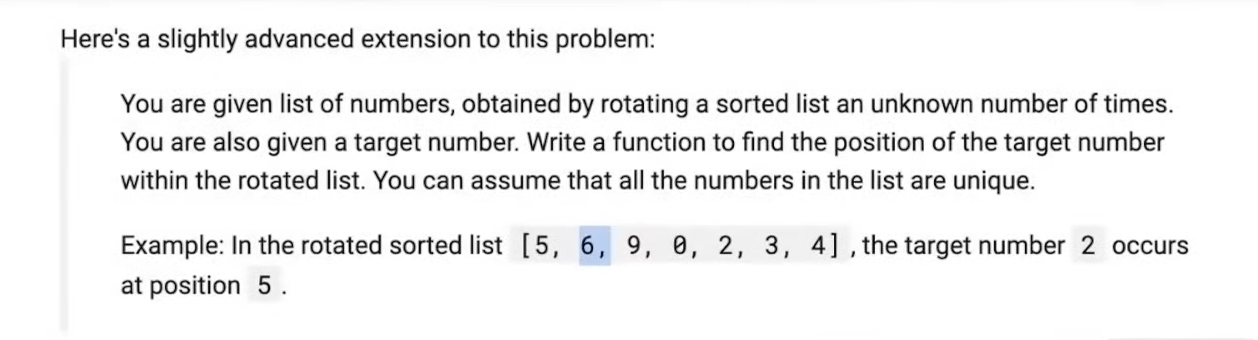

In [26]:
def find_target(arr: int, target: int):

    def condition(mid):
        if arr[mid] == target:
            return "found"
        elif arr[mid] > target:
            return "left"
        return "right"
    pivot_index = count_rotated_index(arr)

    if target == arr[pivot_index]:
        return pivot_index

    if target > arr[pivot_index] and target <= arr[len(arr) -1]:
        return binary_search(pivot_index, len(arr) -1, condition)
    else:
        return binary_search(0, pivot_index -1, condition)

In [27]:
find_target([5, 6, 9, 0, 2, 3, 4], 3)

start=0, end=6, mid=3
3


5

In [28]:
def locate_target(arr: List[int], target):
    start , end = 0, len(arr) -1
    while( end >= start ):
        mid = end - (end - start)//2

        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            start = mid + 1
        else:
            end = mid -1
    return -1

In [29]:
locate_target([5, 6, 9, 0, 2, 3, 4], 3)

5

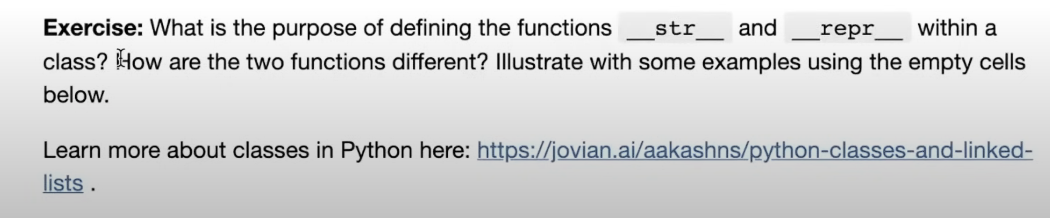

In [30]:
def locate_target2(arr, target):
    start, end = 0, len(arr) -1

    while( start <= end ):
        mid = end - ( end - start )//2

        if arr[mid] == target:
            return mid
        if arr[mid] <= arr[end]:
            if arr[mid] < target <= arr[end]:
                start = mid + 1
            else:
                end = mid -1
        else:
            if arr[start] <= target < arr[mid]:
                end = mid -1
            else:
                start = mid + 1

In [31]:
locate_target2([5, 6, 9, 0, 2, 3, 4], 9)

2